**Loading/Imports**

In [45]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('./data/Trip.csv')


In [46]:
print(df.shape)
print(df.columns)
df

(560, 19)
Index(['id', 'city', 'country', 'region', 'short_description', 'latitude',
       'longitude', 'avg_temp_monthly', 'ideal_durations', 'budget_level',
       'culture', 'adventure', 'nature', 'beaches', 'nightlife', 'cuisine',
       'wellness', 'urban', 'seclusion'],
      dtype='object')


,id,city,country,region,short_description,latitude,longitude,avg_temp_monthly,ideal_durations,budget_level,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion
0,c54acf38-3029-496b-8c7a-8343ad82785c,Milan,Italy,europe,"Chic streets lined with fashion boutiques, his...",45.464194,9.189635,"{""1"":{""avg"":3.7,""max"":7.8,""min"":0.4},""2"":{""avg...","[""Short trip"",""One week""]",Luxury,5,2,2,1,4,5,3,5,2
1,0bd12654-ed64-424e-a044-7bc574bcf078,Yasawa Islands,Fiji,oceania,"Crystal-clear waters, secluded beaches, and vi...",-17.290947,177.125786,"{""1"":{""avg"":28,""max"":30.8,""min"":25.8},""2"":{""av...","[""Long trip"",""One week""]",Luxury,2,4,5,5,2,3,4,1,5
2,73036cda-9134-46fc-a2c6-807782d59dfb,Whistler,Canada,north_america,Snow-capped peaks and lush forests create a se...,50.117190,-122.954302,"{""1"":{""avg"":-2.5,""max"":0.4,""min"":-5.5},""2"":{""a...","[""Short trip"",""Weekend"",""One week""]",Luxury,3,5,5,2,3,3,4,2,4
3,3872c9c0-6b6e-49e1-9743-f46bfe591b86,Guanajuato,Mexico,north_america,Winding cobblestone streets and colorful facad...,20.987700,-101.000000,"{""1"":{""avg"":15.5,""max"":22.8,""min"":8.7},""2"":{""a...","[""Weekend"",""One week"",""Short trip""]",Mid-range,5,3,3,1,3,4,3,4,2
4,e1ebc1b6-8798-422d-847a-22016faff3fd,Surabaya,Indonesia,asia,Bustling streets filled with the aroma of loca...,-7.245972,112.737827,"{""1"":{""avg"":28.1,""max"":32.5,""min"":25.5},""2"":{""...","[""Short trip"",""Weekend""]",Budget,4,3,3,2,3,4,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,778d28df-a4fa-4328-896e-4a9f80216fda,Maun,Botswana,africa,"A gateway to the Okavango Delta, offering a se...",-19.986095,23.422435,"{""1"":{""avg"":26.6,""max"":32,""min"":21.2},""2"":{""av...","[""One week"",""Short trip""]",Mid-range,3,5,5,1,2,3,3,2,4
556,44fb18eb-2641-46ab-b3fa-df6870ba3c74,Gothenburg,Sweden,europe,"A charming city with picturesque canals, lush ...",57.707233,11.967017,"{""1"":{""avg"":1.4,""max"":3.2,""min"":-1.2},""2"":{""av...","[""Weekend"",""One week"",""Short trip""]",Mid-range,4,3,4,3,3,4,3,4,3
557,8c8c7203-2a45-44ba-9fb2-b5158104375e,Manchester,United Kingdom,europe,"Industrial heritage meets modern creativity, w...",53.479489,-2.245115,"{""1"":{""avg"":4.7,""max"":7.1,""min"":2},""2"":{""avg"":...","[""Weekend"",""One week"",""Short trip""]",Mid-range,4,2,2,1,4,4,3,4,2
558,ba72b976-10f9-4415-a818-32cf17d8e649,Copenhagen,Denmark,europe,"Charming canals, vibrant neighborhoods, and a ...",55.686724,12.570072,"{""1"":{""avg"":2.6,""max"":4.2,""min"":0.6},""2"":{""avg...","[""One week"",""Short trip"",""Weekend""]",Mid-range,5,2,3,2,4,4,3,5,2


In [48]:
# Example: drop non-numeric columns
df_numeric = df.select_dtypes(include='number')

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)


In [49]:
pca = PCA(n_components=2)  # You can adjust to more components if needed
pca_result = pca.fit_transform(df_scaled)


In [50]:
# Create a new DataFrame with PCA results
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# (Optional) Add country or city back to the DataFrame if needed
df_pca['country'] = df['country'].values  # Adjust if needed

print(df_pca.head())


        PC1       PC2    country
0  4.153500 -0.355397      Italy
1 -4.795949  1.207923       Fiji
2 -2.673531  1.125844     Canada
3  1.903609 -0.404263     Mexico
4  1.092429 -0.032168  Indonesia


          PC1       PC2         country
0    4.153500 -0.355397           Italy
1   -4.795949  1.207923            Fiji
2   -2.673531  1.125844          Canada
3    1.903609 -0.404263          Mexico
4    1.092429 -0.032168       Indonesia
..        ...       ...             ...
555 -3.437896 -0.240673        Botswana
556  0.658987  0.041438          Sweden
557  2.912665 -0.738716  United Kingdom
558  3.188719 -0.339830         Denmark
559 -1.218570 -2.234729         Bolivia

[560 rows x 3 columns]


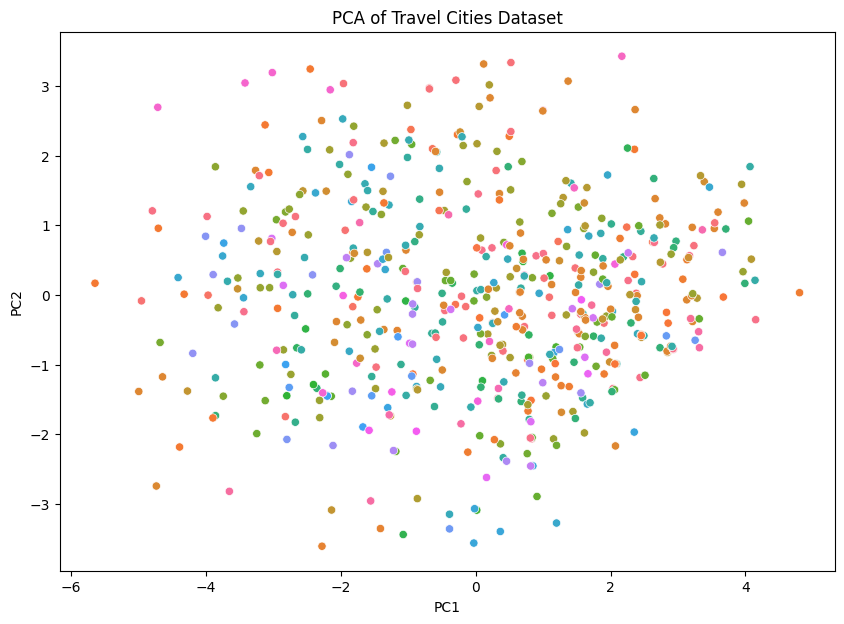

Explained variance by PC1 and PC2: [0.40324892 0.16618497]


In [55]:
# Create a new DataFrame with PCA results
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# (Optional) Add country or city back to the DataFrame if needed
df_pca['country'] = df['country'].values  # Adjust if needed

print(df_pca)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='country', legend=False)
plt.title('PCA of Travel Cities Dataset')
plt.show()


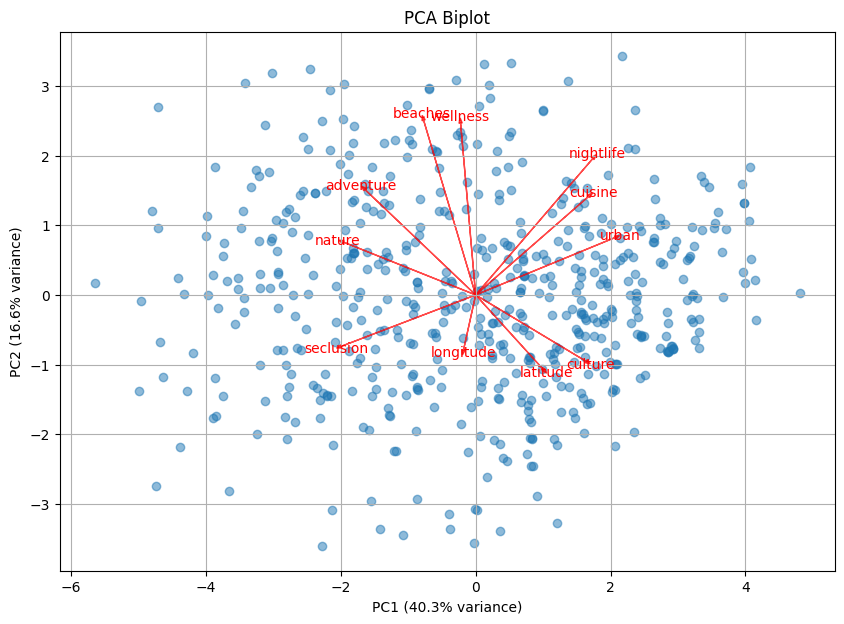

Explained variance by PC1 and PC2: [0.40324892 0.16618497]


In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# Scatter of PCA components
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel(f"PC1 ({explained_variance[0]:.1%} variance)")
plt.ylabel(f"PC2 ({explained_variance[1]:.1%} variance)")

# Plot feature vectors
for i, feature in enumerate(df_numeric.columns):
    plt.arrow(0, 0,
              pca.components_[0, i]*5,  # scale arrows
              pca.components_[1, i]*5,
              color='r', alpha=0.7, head_width=0.05)
    plt.text(pca.components_[0, i]*5.2,
             pca.components_[1, i]*5.2,
             feature, color='r', ha='center', va='center')

plt.title("PCA Biplot")
plt.grid()
plt.show()
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1 and PC2: {explained_variance}")




In [59]:
print(df_pca)

          PC1       PC2         country
0    4.153500 -0.355397           Italy
1   -4.795949  1.207923            Fiji
2   -2.673531  1.125844          Canada
3    1.903609 -0.404263          Mexico
4    1.092429 -0.032168       Indonesia
..        ...       ...             ...
555 -3.437896 -0.240673        Botswana
556  0.658987  0.041438          Sweden
557  2.912665 -0.738716  United Kingdom
558  3.188719 -0.339830         Denmark
559 -1.218570 -2.234729         Bolivia

[560 rows x 3 columns]


In [60]:
from sklearn.cluster import KMeans

# Choose number of clusters (e.g. 5)
kmeans = KMeans(n_clusters=5, random_state=42)
df_pca['cluster'] = kmeans.fit_predict(pca_result)


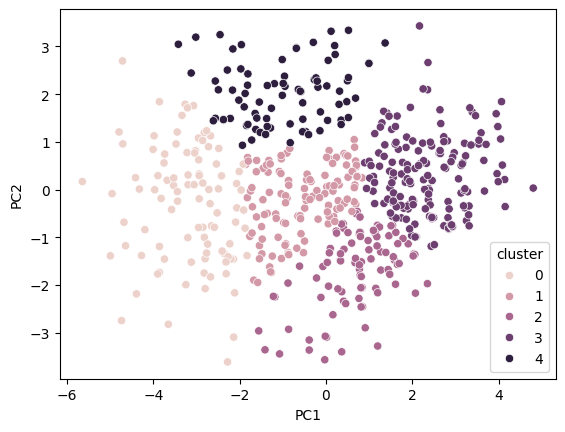

In [64]:
import seaborn as sns
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster')
cluster_names = {
    0: "Urban Nightlife",
    1: "Nature Adventure",
    2: "Wellness Retreats",
    3: "Cultural Cities",
    4: "Remote Seclusion"
}
df_pca['cluster_name'] = df_pca['cluster'].map(cluster_names)
